# Import Libraries & Load Data

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Normalizer
from sklearn.pipeline import make_pipeline

In [106]:
train = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\machine_learning\Week2\blueberry-yield-zindua-machine-week-2-challenge (1)\train.csv')

In [107]:
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


# Missingness

In [108]:
train.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

Summary:
- No missing values
- All features are numeric

# Explore The Distribution in the Data

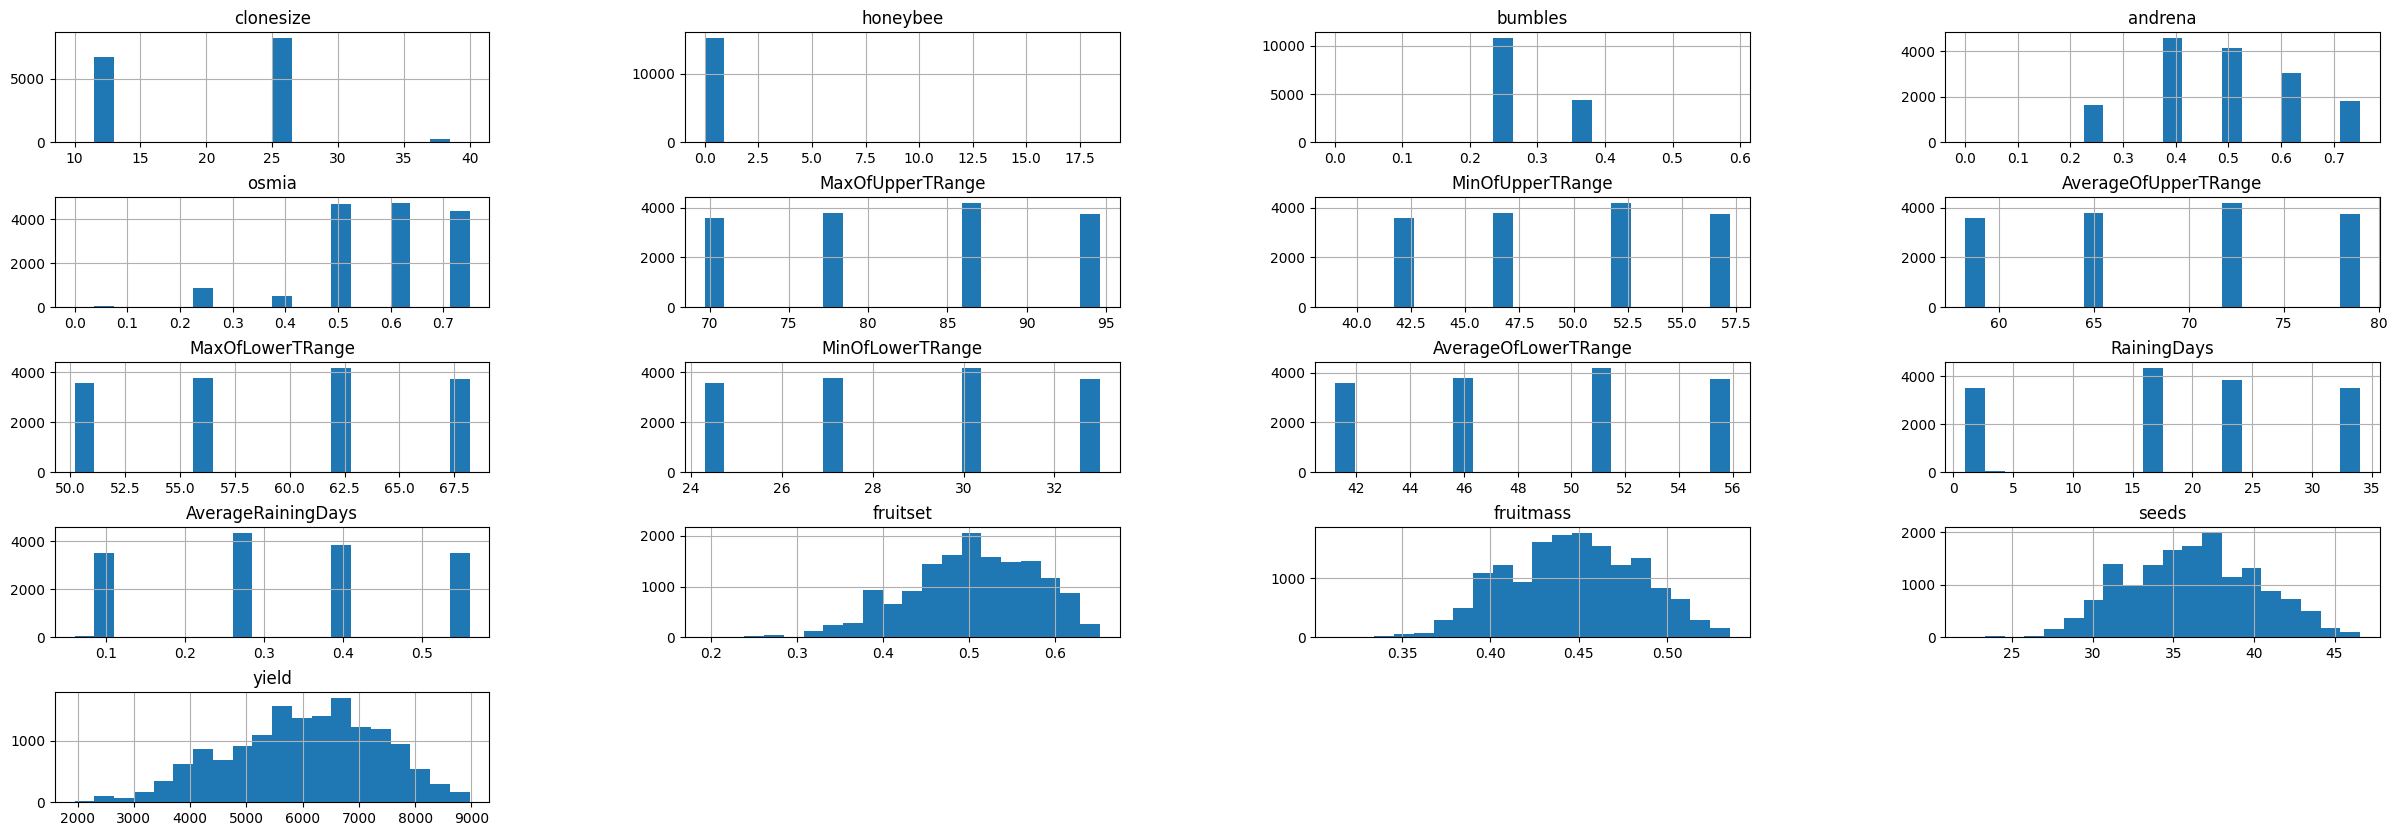

In [110]:
train.drop('id', axis=1).hist(figsize=(30,10), bins=20)
plt.subplots_adjust(hspace=0.5, wspace=0.45)
plt.show()

Summary:
fruitset, fruitmass, seeds, yield – Normal distribution
clonesize, honeybee, osmia, 
MaxOfUpperTRange, MinOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, AverageOfLowerTRange, RainingDays- uniform distribution
 seeds- discrete distributions

In [111]:
train.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


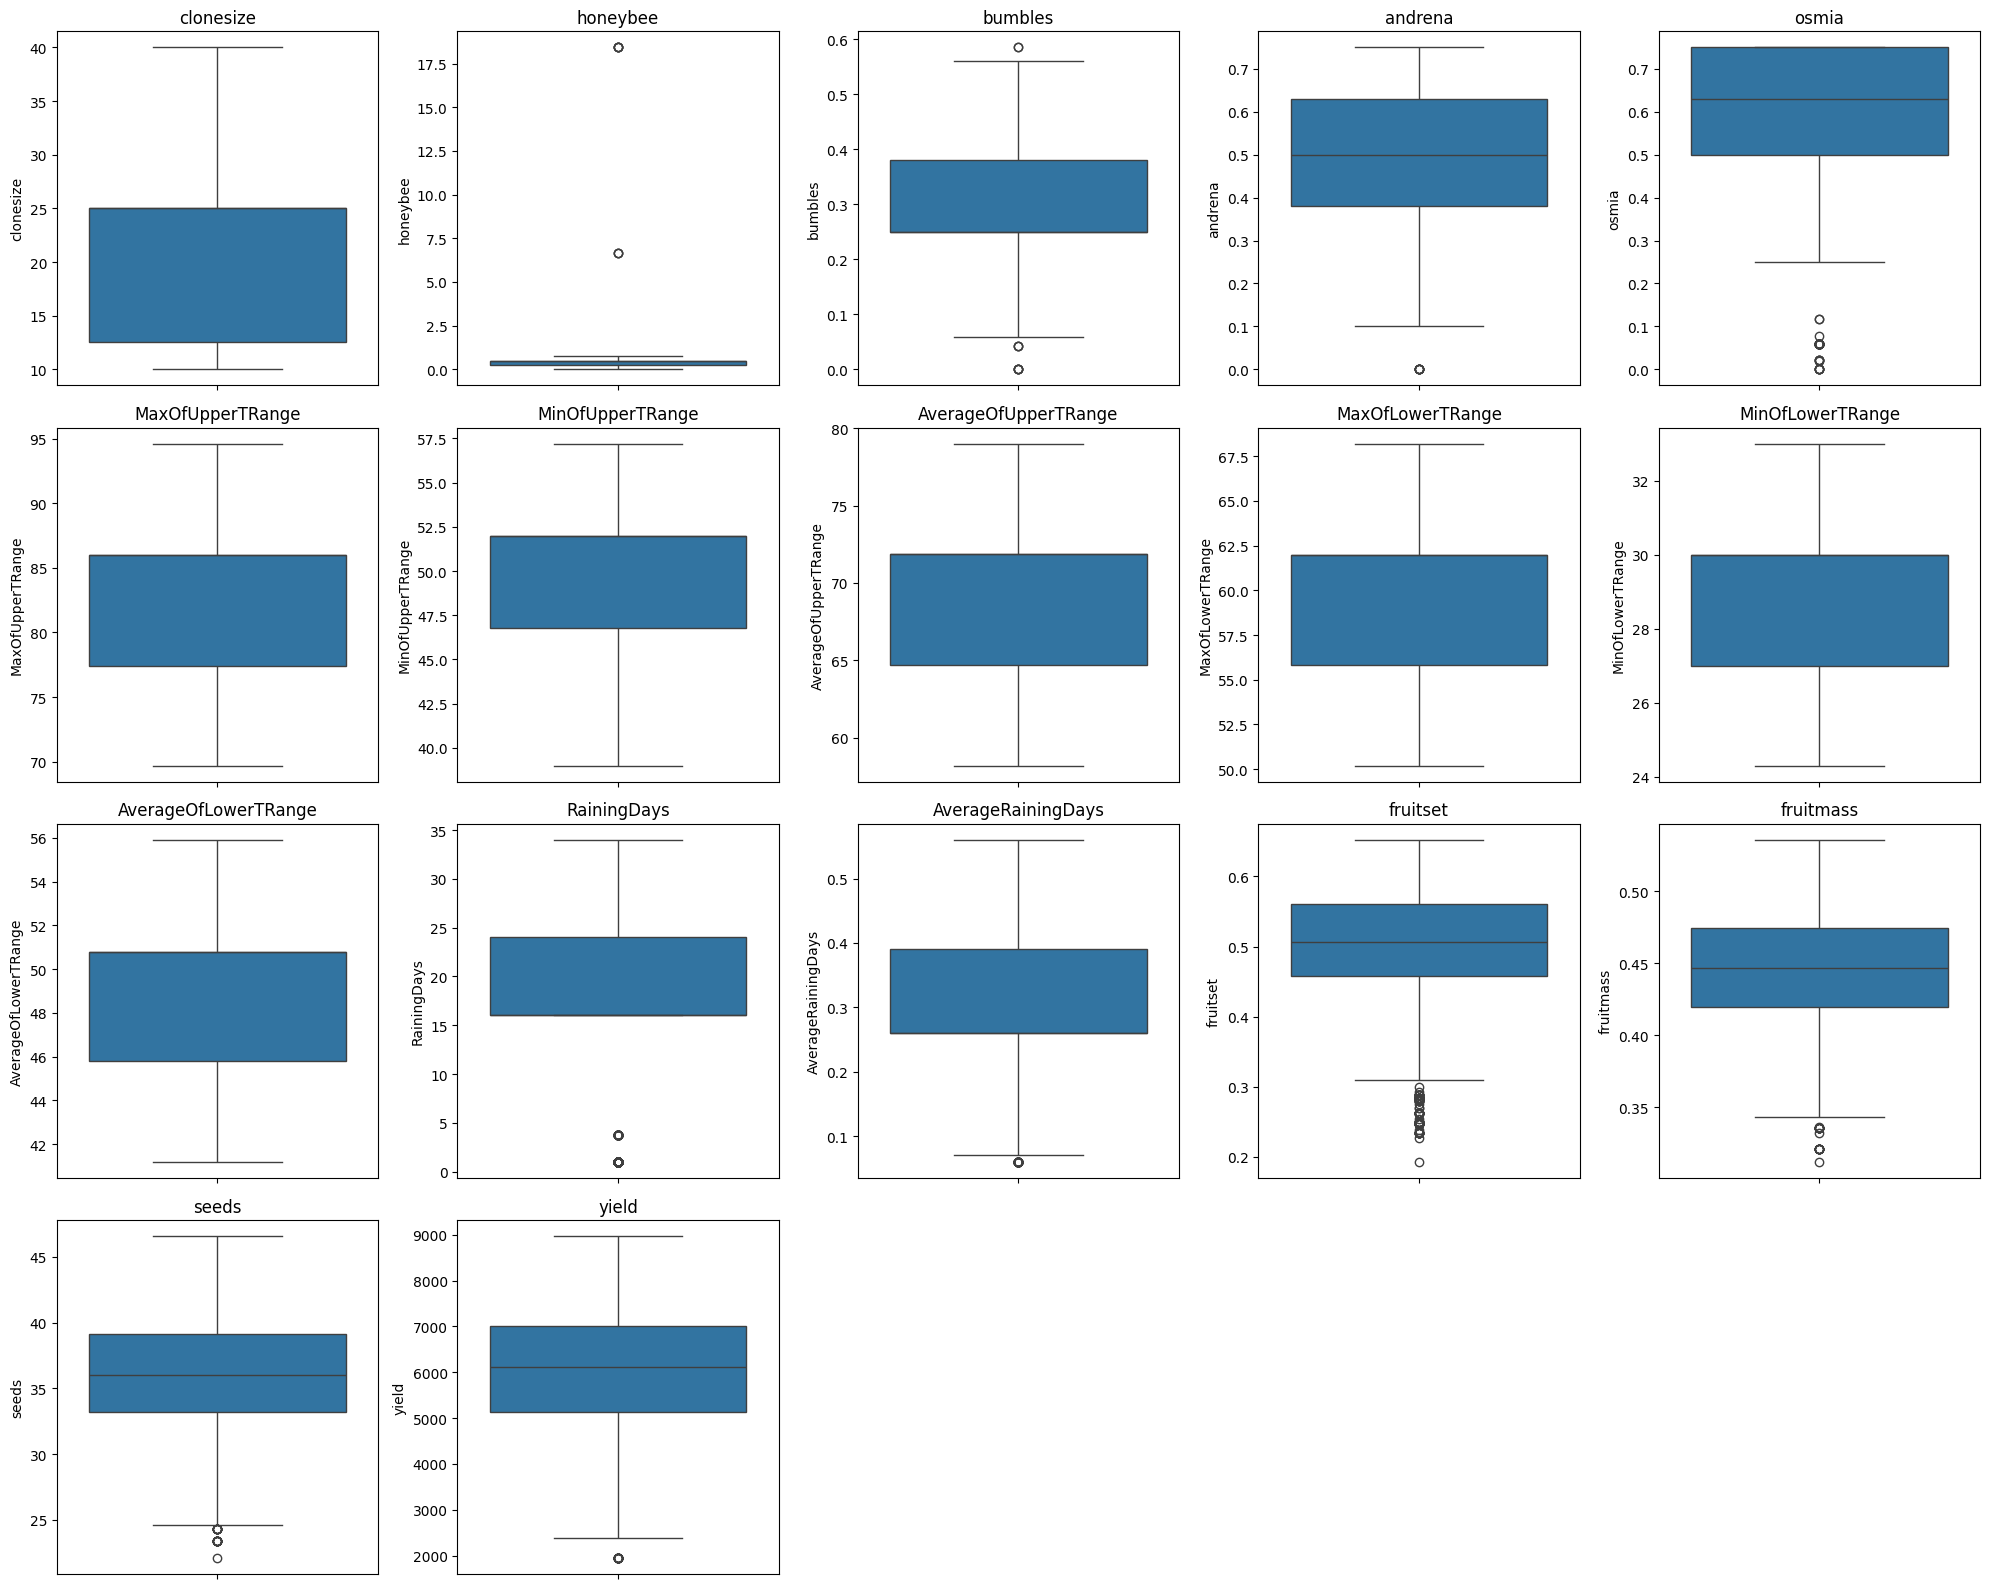

In [112]:
numeric_cols = train.select_dtypes(include='number').columns.drop('id')
plots_per_row = 5
n_rows = (len(numeric_cols) - 1) // plots_per_row + 1

plt.figure(figsize=(20, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, plots_per_row, i)
    sns.boxplot(y=train[col])
    plt.title(col)

plt.tight_layout()
plt.show()

- No extreme outliers: Clonesize, MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, AverageOfLowerTRange
- Extreme low outliers: Andrena, Osmia, RainingDays, AverageRainingDays, Fruitset, Fruitmass, Seeds, Yield
- Both high and low outliers: Bumbles
- Several extreme outliers: Honeybee

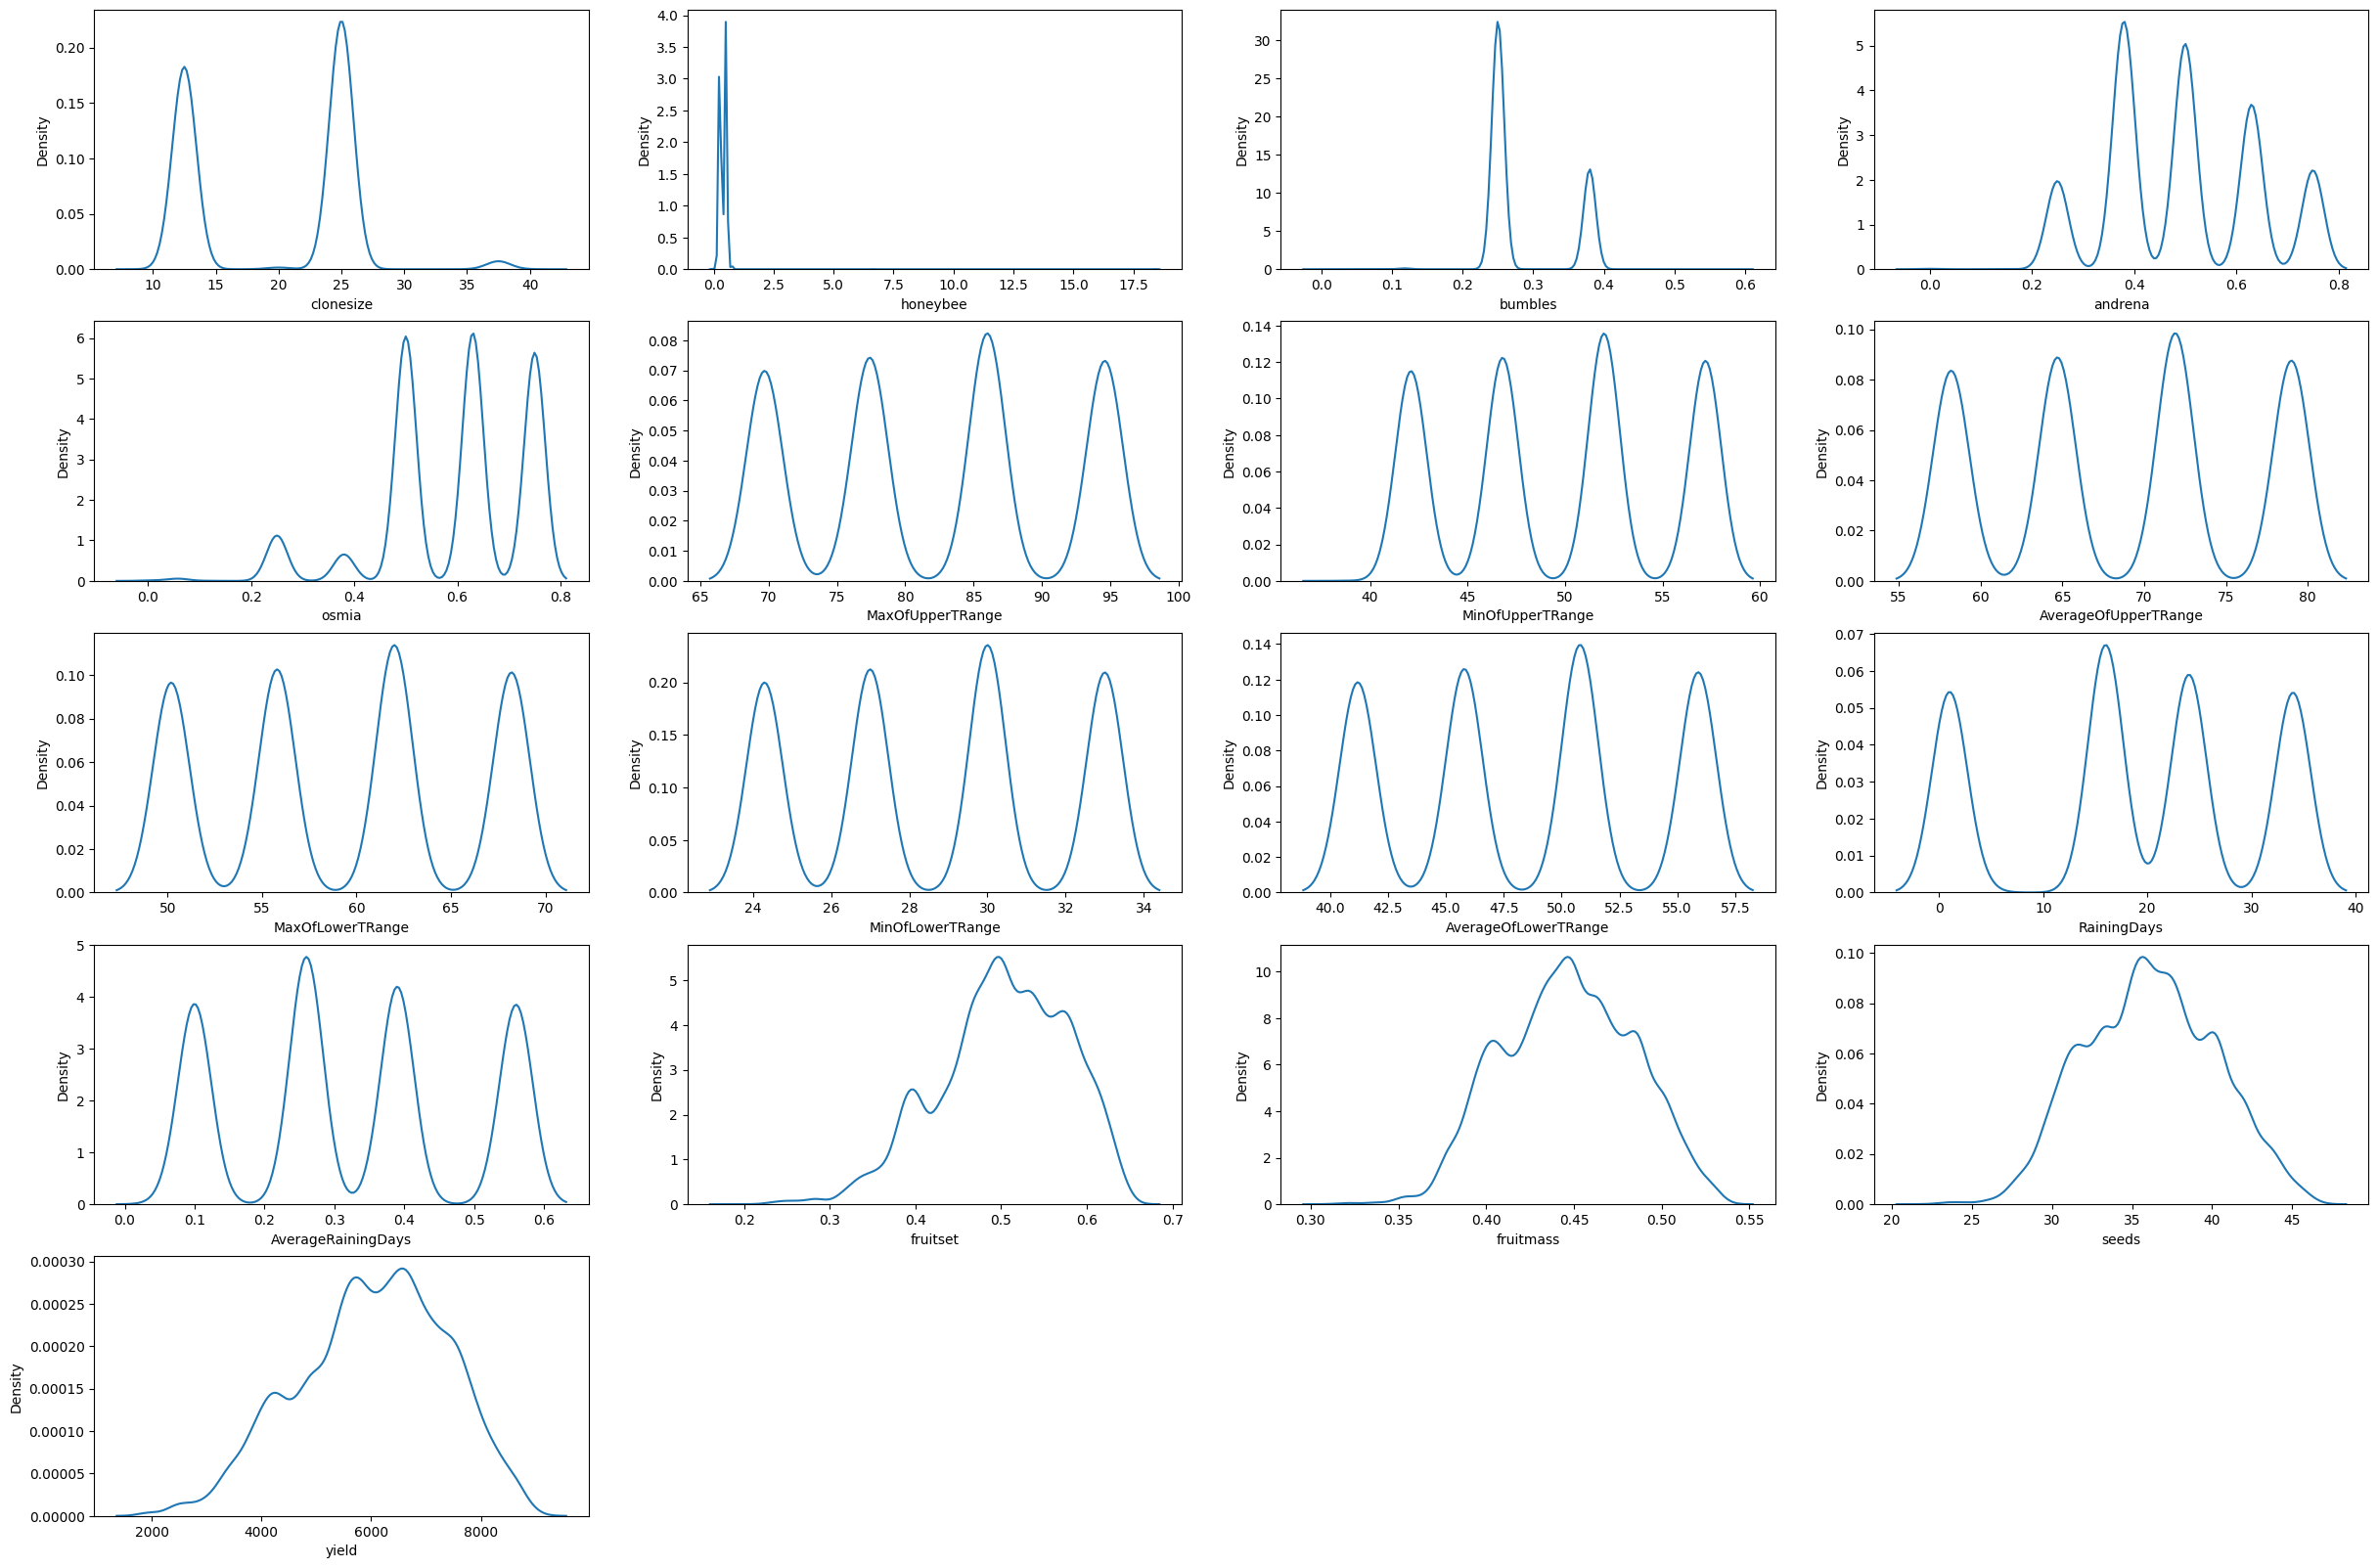

In [113]:
# kde plot 
fig = plt.figure(figsize=(30,20))
for i in range(len(train.columns.drop('id'))):
    ax=fig.add_subplot(5,4,i+1)
    sns.kdeplot(train[train.columns.drop('id')[i]])

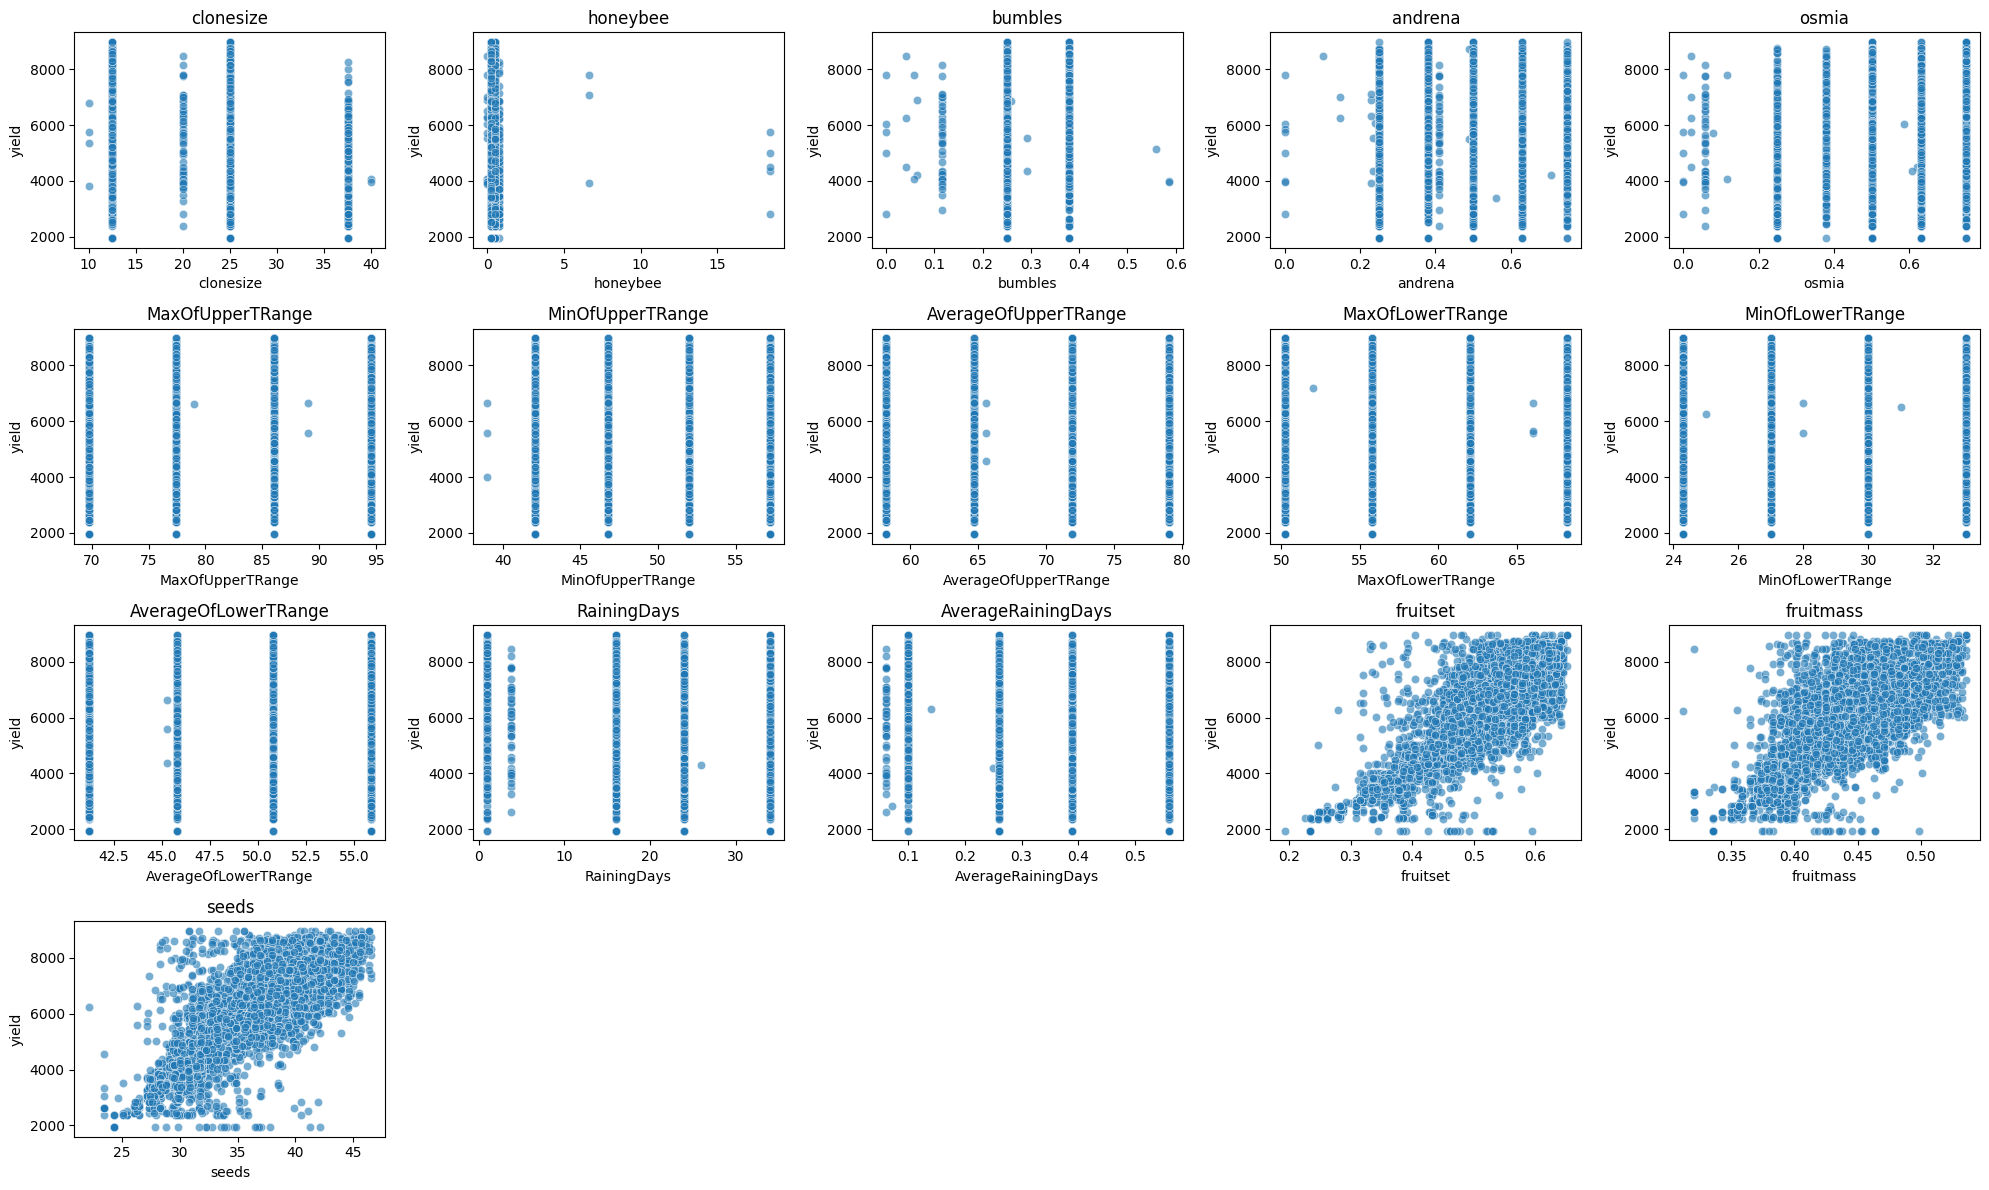

In [114]:
features = train.columns[1:17]

plt.figure(figsize=(20,12))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 5, i)
    sns.scatterplot(x=train[feature], y=train['yield'], alpha=0.6)
    plt.title(feature)

plt.tight_layout()
plt.show()


# Data Preprocessing

In [115]:
X = train.drop(columns=['id', 'yield'])
y = train['yield']

# Model Selection

In [123]:
# Train split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=48, test_size=0.3)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

(10702, 16) (10702,) (4587, 16) (4587,)


Define Linear Regression model

In [124]:
reg_model = LinearRegression()
reg_model.fit(x_train_scaled, y_train)

# Predict
y_pred = reg_model.predict(x_test_scaled)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.8170123280187005
MAE: 362.77743868258057


In [125]:
# Cross-validation
scores = cross_val_score(LinearRegression(), x_train_scaled, y_train, cv=5, scoring= 'neg_mean_absolute_error').mean() * -1
print(scores)

377.82672425843566


Define Ridge Regression model

In [126]:
poly_pipe = make_pipeline(Ridge(alpha=0.01))
scores = cross_val_score(poly_pipe, x_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean() * -1
print(scores)

376.84254400549423


Define Lasso Regression model

In [127]:
poly_pipe = make_pipeline(PolynomialFeatures(degree=1),StandardScaler(),Lasso(alpha=5, max_iter=5000))
scores = cross_val_score(poly_pipe, x_train, y_train, cv=5, scoring= 'neg_mean_absolute_error').mean() * -1
print(scores, scores.mean())

376.45256388072517 376.45256388072517


I chose Ridge regression because it produced the lowest error on my validation set compared to other models. Its ability to shrink coefficients while keeping all features ensured that useful predictors were retained, leading to better generalization and stability. This made Ridge the best-performing and most reliable model for my task.

# Fit and Exporting Final Model

In [122]:
model = make_pipeline(StandardScaler(), Ridge(alpha=1))
model.fit(X, y)
pickle.dump(model, open('final/model.sav', 'wb'))